In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import KFold, LeaveOneOut
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler

plt.style.use('ggplot')
%matplotlib inline

# read excel file
df = pd.read_excel('C:/Users/acc_a/OneDrive/PhOLED 300.xlsx', sheetname='Sheet2')
df = df[list(df.columns)[1:]]
print(df.shape)
df.head()

(313, 32)


,homo_HIL,thickness_HIL,lumo_HTL1,homo_HTL1,thickness_HTL1,lumo_HTL2,homo_HTL2,thickness_HTL2,lumo_HTL3,homo_HTL3,...,total_ETL_thickness,lumo_ETL1,homo_ETL1,thickness_ETL1,lumo_ETL2,homo_ETL2,thickness_ETL2,cathode_workfunction,thickness_cathode1,cd/A
0,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,35.0,2.8,6.2,0,2.8,6.2,35,2.8,10.0,5.0
1,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,35.0,2.8,6.2,0,2.8,6.2,35,2.8,10.0,4.0
2,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,35.0,2.8,6.2,0,2.8,6.2,35,2.8,10.0,9.0
3,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,35.0,2.8,6.2,0,2.8,6.2,35,2.8,10.0,12.0
4,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,35.0,2.8,6.2,0,2.8,6.2,35,2.8,10.0,8.0


In [2]:
#Checking for missing data
NAs = df.isnull().sum()
NAs.sort_values(0, ascending=False)
NAs[NAs > 0] #check wnumber of null values in column

# np.nonzero(pd.isnull(df.values).any(1)) #check the index of missing value

# drop the missing data
df.dropna(axis=0, inplace=True)
print(df.shape)

(304, 32)


In [3]:
X = df.iloc[:, :-1]
y = df[['cd/A']]
print(X.shape)
X.head()

(304, 31)


,homo_HIL,thickness_HIL,lumo_HTL1,homo_HTL1,thickness_HTL1,lumo_HTL2,homo_HTL2,thickness_HTL2,lumo_HTL3,homo_HTL3,...,triplet_ETL,total_ETL_thickness,lumo_ETL1,homo_ETL1,thickness_ETL1,lumo_ETL2,homo_ETL2,thickness_ETL2,cathode_workfunction,thickness_cathode1
0,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,2.6,35.0,2.8,6.2,0,2.8,6.2,35,2.8,10.0
1,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,2.6,35.0,2.8,6.2,0,2.8,6.2,35,2.8,10.0
2,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,2.6,35.0,2.8,6.2,0,2.8,6.2,35,2.8,10.0
3,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,2.6,35.0,2.8,6.2,0,2.8,6.2,35,2.8,10.0
4,5.2,25.0,3.3,5.2,0,3.3,5.2,0,3.3,5.2,...,2.6,35.0,2.8,6.2,0,2.8,6.2,35,2.8,10.0


In [18]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

rs = 24

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=rs)

kfold = KFold(n_splits=5, shuffle=True, random_state=rs)
loo = LeaveOneOut()

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

# define and fit the final model
def baseline_model():
    model = Sequential()
    model.add(Dense(31, input_dim=X_train.shape[1], activation='relu'))
#     model.add(Dense(31, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(500, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1, activation='relu'))
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])    
    return model
    
regressor = KerasRegressor(build_fn=baseline_model, verbose=False)

# # define the grid search parameters
# batch_size = [5, 10]
# epochs = [100, 250]
# param_grid = dict(batch_size=batch_size, epochs=epochs)
# grid = GridSearchCV(estimator=regressor, param_grid=param_grid, n_jobs=-1)
# grid_result = grid.fit(X, y)

# regressor.fit(np.array(X_train), np.array(y_train));

In [ ]:
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

In [8]:
y_predictions = regressor.predict(np.array(X_test))
pred_train = regressor.predict(np.array(X_train))

In [9]:
results = cross_val_score(regressor,np.array(X), np.array(y), cv=kfold)
print(np.sqrt(results))

[ 13.61731465  12.24450578  29.6333334    9.72056399  13.04278866]


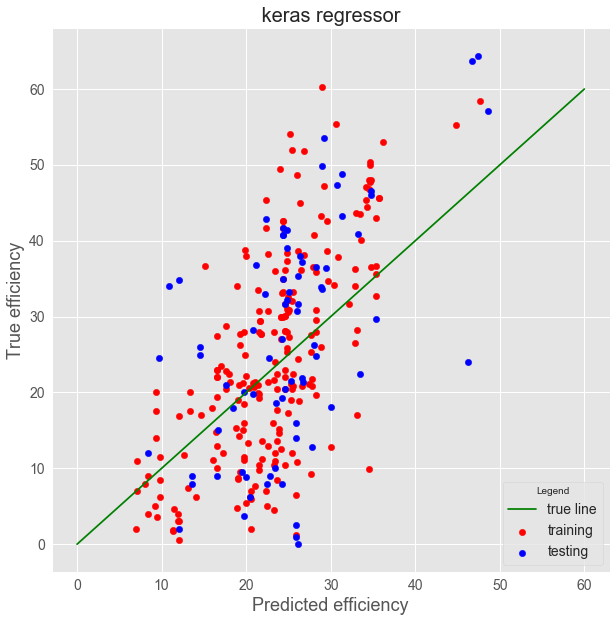

In [10]:
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.scatter(pred_train, y_train, c='r', s=40, label='training')
plt.scatter(y_predictions, y_test, c='b', s=40, label='testing')
plt.plot([0, 60], [-0,60], 'g-', label='true line')
plt.legend(loc=4, frameon=True, title='Legend', fontsize=14);
plt.ylabel('True efficiency', fontsize=18)
plt.xlabel('Predicted efficiency', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(' keras regressor ',fontsize=20)
plt.xticks(fontsize=14)
plt.show()

In [19]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [31]:
def second_model():
    model = Sequential()
    model.add(Dense(31, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='relu'))
    model.compile(loss='mse', optimizer='adam', metrics=['mse'])
    
    return model

regressor = KerasRegressor(build_fn=second_model, nb_epoch=1000000, batch_size=25, verbose=False)

regressor.fit(np.array(X_train_norm), np.array(y_train))

y_predictions = regressor.predict(np.array(X_test_norm))
pred_train = regressor.predict(np.array(X_train_norm))

In [32]:
results = cross_val_score(regressor,np.array(X), np.array(y), cv=kfold)
print(np.sqrt(results))
print(np.mean(np.sqrt(results)))

[ 12.80671493  12.20790254  12.58473767  11.05810085  12.1445859 ]
12.1604083782


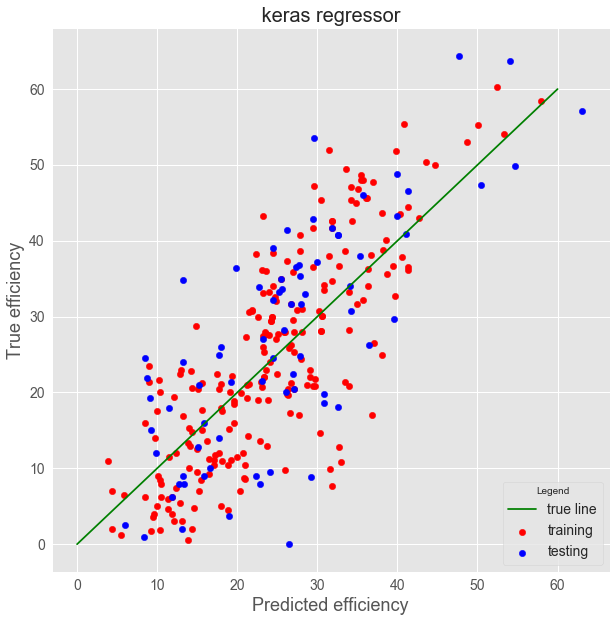

In [33]:
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.scatter(pred_train, y_train, c='r', s=40, label='training')
plt.scatter(y_predictions, y_test, c='b', s=40, label='testing')
plt.plot([0, 60], [-0,60], 'g-', label='true line')
plt.legend(loc=4, frameon=True, title='Legend', fontsize=14);
plt.ylabel('True efficiency', fontsize=18)
plt.xlabel('Predicted efficiency', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(' keras regressor ',fontsize=20)
plt.xticks(fontsize=14)
plt.show()

## linear regression

In [46]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train.values.ravel())

results = cross_val_score(regressor,np.array(X), np.array(y), cv=kfold)
print(np.sqrt(results))

y_predictions = regressor.predict(np.array(X_test))
pred_train = regressor.predict(np.array(X_train))

[ 0.67821818  0.57858379  0.41760599  0.53988039  0.41102973]


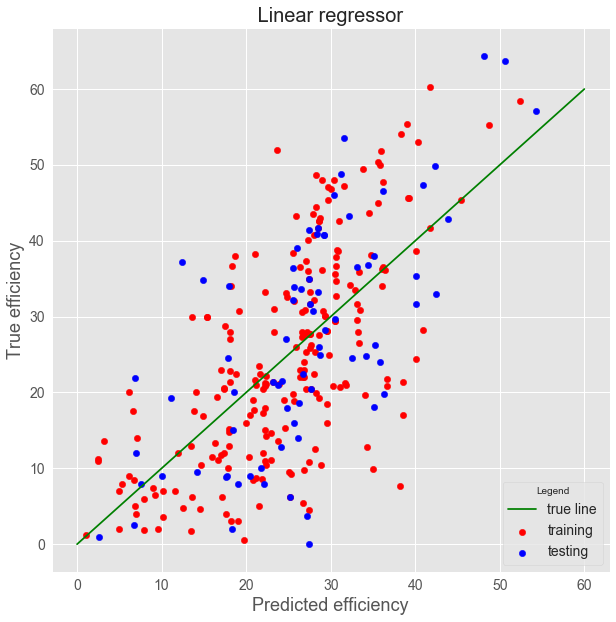

In [47]:
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.scatter(pred_train, y_train, c='r', s=40, label='training')
plt.scatter(y_predictions, y_test, c='b', s=40, label='testing')
plt.plot([0, 60], [-0,60], 'g-', label='true line')
plt.legend(loc=4, frameon=True, title='Legend', fontsize=14);
plt.ylabel('True efficiency', fontsize=18)
plt.xlabel('Predicted efficiency', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(' Linear regressor ',fontsize=20)
plt.xticks(fontsize=14)
plt.show()